In [26]:
# https://www.kaggle.com/shayanfazeli/heartbeat   # data set 


# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # plotting
import os
import sklearn
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [27]:
# reading csv file  
normal=pd.read_csv("ptbdb_normal.csv",header=None) 
#normal.head(2) #for 2 rows
#normal.head() #for some top rows
#normal

abnormal=pd.read_csv("ptbdb_abnormal.csv",header=None) 
#abnormal

test=pd.read_csv("mitbih_test.csv",header=None) 
#test.head(2)
#test

In [28]:
train=pd.read_csv("mitbih_train.csv",header=None) 
train

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,0.423611,0.791667,1.000000,0.256944,0.000000,0.277778,0.465278,0.520833,0.472222,0.555556,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,0.716814,0.539823,0.283186,0.129794,0.064897,0.076696,0.026549,0.032448,0.008850,0.044248,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,0.874214,0.849057,0.480084,0.058700,0.090147,0.310273,0.387841,0.385744,0.389937,0.392034,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,1.000000,0.996086,0.694716,0.336595,0.238748,0.268102,0.191781,0.174168,0.164384,0.187867,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [29]:
#print("Type\tCount")
#print((train[187]).value_counts())

In [30]:
y_train=train.iloc[:,187] 
print("y_train shape : ",y_train.shape)


x_train=train.iloc[:,0:187] 
print("x_train shape : ",x_train.shape)

#y_train=train[187].values   # it give array
#y_train

#y_test=test[187].values
#y_train



y_train shape :  (87554,)
x_train shape :  (87554, 187)


In [31]:
print("*********************************")

classes_count=y_train.value_counts().reset_index()
print(classes_count)

print("*********************************")

*********************************
   index    187
0    0.0  72471
1    4.0   6431
2    2.0   5788
3    1.0   2223
4    3.0    641
*********************************


<BarContainer object of 5 artists>

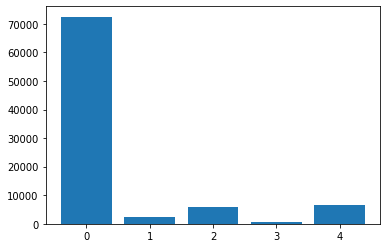

In [32]:
plt.bar(classes_count.iloc[:,0],classes_count.iloc[:,1])


In [33]:
class0=np.where(y_train==0)[0].flatten()
class1=np.where(y_train==1)[0].flatten()
class2=np.where(y_train==2)[0].flatten()
class3=np.where(y_train==3)[0].flatten()
class4=np.where(y_train==4)[0].flatten()

Text(0.5, 1.0, '1-beat ECG for every category')

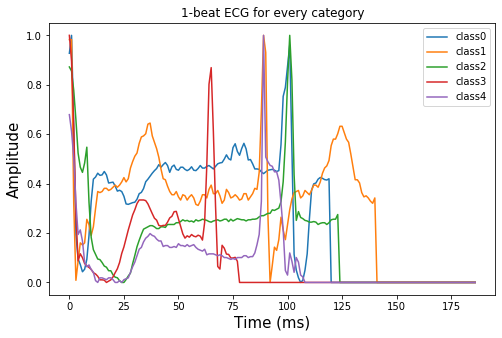

In [34]:
plt.figure(figsize=(8,5))
plt.plot(x_train.iloc[class0[5],:],label='class0')
plt.plot(x_train.iloc[class1[5],:],label='class1')
plt.plot(x_train.iloc[class2[5],:],label='class2')
plt.plot(x_train.iloc[class3[5],:],label='class3')
plt.plot(x_train.iloc[class4[5],:],label='class4')
plt.legend()
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.title('1-beat ECG for every category')

In [35]:
# other way to plot

'''M = train.values
X = M[:, :-1]
y = M[:, -1].astype(int)

C0 = np.argwhere(y == 0).flatten()
C1 = np.argwhere(y == 1).flatten()
C2 = np.argwhere(y == 2).flatten()
C3 = np.argwhere(y == 3).flatten()
C4 = np.argwhere(y == 4).flatten()



x = np.arange(0, 187)*8/1000

plt.figure(figsize=(8,5))
plt.plot(x, X[C0, :][0], label="Cat. N")
plt.plot(x, X[C1, :][0], label="Cat. S")
plt.plot(x, X[C2, :][0], label="Cat. V")
plt.plot(x, X[C3, :][0], label="Cat. F")
plt.plot(x, X[C4, :][0], label="Cat. Q")
plt.legend()
plt.title("1-beat ECG for every category", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()'''

'M = train.values\nX = M[:, :-1]\ny = M[:, -1].astype(int)\n\nC0 = np.argwhere(y == 0).flatten()\nC1 = np.argwhere(y == 1).flatten()\nC2 = np.argwhere(y == 2).flatten()\nC3 = np.argwhere(y == 3).flatten()\nC4 = np.argwhere(y == 4).flatten()\n\n\n\nx = np.arange(0, 187)*8/1000\n\nplt.figure(figsize=(8,5))\nplt.plot(x, X[C0, :][0], label="Cat. N")\nplt.plot(x, X[C1, :][0], label="Cat. S")\nplt.plot(x, X[C2, :][0], label="Cat. V")\nplt.plot(x, X[C3, :][0], label="Cat. F")\nplt.plot(x, X[C4, :][0], label="Cat. Q")\nplt.legend()\nplt.title("1-beat ECG for every category", fontsize=20)\nplt.ylabel("Amplitude", fontsize=15)\nplt.xlabel("Time (ms)", fontsize=15)\nplt.show()'

In [37]:
# feature extraction

from scipy.signal import find_peaks,peak_widths,peak_prominences,argrelmin,argrelmax,argrelextrema,spectrogram
pk=find_peaks(x_train.iloc[0,:])
print(pk)

peaks=[]
height=[]
width=[]
prominance=[]
arg_min=[]
arg_max=[]
for i in range(len(x_train)):
    peak,hei=find_peaks(x_train.iloc[i,:],height=0)
    peaks.append(peak)
    height.append(hei['peak_heights'])
    wid=peak_widths(x_train.iloc[i,:],peak)[0]
    width.append(wid)
    pro=peak_prominences(x_train.iloc[i,:],peak)[0]
    prominance.append(pro)
    amin=argrelmin(np.array(x_train.iloc[i,:]))[0]
    arg_min.append(amin)
    amax=argrelmax(np.array(x_train.iloc[i,:]))[0]
    arg_max.append(amax)

(array([ 5, 12, 15, 20, 24, 28, 30, 32, 34, 36, 38, 44, 48, 51, 53, 55, 60,
       65, 73, 75, 83, 88, 93, 95, 97, 99], dtype=int64), {})


In [38]:
f1_len=max([len(i) for i in peaks])
f2_len=max([len(i) for i in height])
f3_len=max([len(i) for i in width])
f4_len=max([len(i) for i in prominance])
f5_len=max([len(i) for i in arg_min])
f6_len=max([len(i) for i in arg_max])

In [39]:
F1_peaks=[]
F2_height=[]
F3_width=[]
F4_prominance=[]
F5_argmin=[]
F6_argmax=[]
for i in range(len(peaks)):
    pa1=np.pad(peaks[i],(0,f1_len-len(peaks[i])),'constant')
    F1_peaks.append(pa1)
    pa2=np.pad(height[i],(0,f2_len-len(height[i])),'constant')
    F2_height.append(pa2)
    pa3=np.pad(width[i],(0,f3_len-len(width[i])),'constant')
    F3_width.append(pa3)
    pa4=np.pad(prominance[i],(0,f4_len-len(prominance[i])),'constant')
    F4_prominance.append(pa4)
    pa5=np.pad(arg_min[i],(0,f5_len-len(arg_min[i])),'constant')
    F5_argmin.append(pa5)
    pa6=np.pad(arg_max[i],(0,f6_len-len(arg_max[i])),'constant')
    F6_argmax.append(pa6)

In [40]:
feature=np.concatenate((F1_peaks,F2_height,F3_width,F4_prominance,F5_argmin,F6_argmax),axis=1)

In [41]:
feature.shape

(87554, 486)

In [44]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(87554, 187)
(21892, 187)
(87554,)
(21892,)


In [ ]:
seed = 2
np.random.seed(seed)

In [45]:
[x_train1,x_test1,y_train1,y_test1]=train_test_split(feature,y_train,test_size=0.2,random_state=2)

In [46]:
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(70043, 486)
(17511, 486)
(70043,)
(17511,)


In [47]:
# SVM model
a_svm=svm.SVC(gamma='scale')
a_svm.fit(x_train1,y_train1)
y_pred_svm=a_svm.predict(x_test1)


#from sklearn.metrics import classification_report, confusion_matrix
cm_svm=confusion_matrix(y_test1,y_pred_svm)
print(cm_svm)
print("********************************")

report_svm=classification_report(y_test1,y_pred_svm)
print(report_svm)

#Precision=TP/(TP+FP)
#Recall=TP/(TP+FN)
#F1 Score=(2*Recall*Precision)/(Recall+Precision)
#Accuracy=(TP+TN)/(TP+TN+FN+FP)
#Accuracy_Score_svm=accuracy_score(y_test,y_pred_svm)
#print('Average Accuracy:%0.2f +/- (%0.1f) %%' % (Accuracy_Score_svm.mean()*100, Accuracy_Score_svm.std()*100))


print("********************************")


Accuracy_svm=accuracy_score(y_test1, y_pred_svm)
print("Accuracy of svm is : {0}".format(Accuracy_svm))

F1_score_svm= f1_score(y_test1, y_pred_svm,average='weighted')
print('F1_score of svm is : {0}'.format(F1_score_svm))

Recall_svm= recall_score(y_test1, y_pred_svm,average='weighted')
print('Recall of svm is : {0}'.format(Recall_svm))
      
Precision_svm= precision_score(y_test1, y_pred_svm,average='weighted')      
print('Precision of svm is : {0}'.format(Precision_svm))


[[14473     8    30     0    36]
 [  409    28     6     0     0]
 [  914     0   218     0    42]
 [  105     0     0     0     0]
 [  635     0     3     0   604]]
********************************
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93     14547
         1.0       0.78      0.06      0.12       443
         2.0       0.85      0.19      0.30      1174
         3.0       0.00      0.00      0.00       105
         4.0       0.89      0.49      0.63      1242

    accuracy                           0.88     17511
   macro avg       0.68      0.35      0.40     17511
weighted avg       0.87      0.88      0.84     17511

********************************
Accuracy of svm is : 0.8750499685911712
F1_score of svm is : 0.8415374129345626
Recall of svm is : 0.8750499685911712
Precision of svm is : 0.8664551916301537


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
# Logistic Regression
a_lr=LogisticRegression()
a_lr.fit(x_train1,y_train1)
y_pred_lr=a_lr.predict(x_test1)

cm_lr=confusion_matrix(y_test1,y_pred_lr)
print(cm_lr)
print("********************************")

report_lr=classification_report(y_test1,y_pred_lr)
print(report_lr)

print("********************************")

Precision_lr= precision_score(y_test1, y_pred_lr,average='weighted')      
print('Precision of lr is : {0}'.format(Precision_lr))

Recall_lr= recall_score(y_test1, y_pred_lr,average='weighted')
print('Recall of lr is : {0}'.format(Recall_lr))

F1_score_lr= f1_score(y_test1, y_pred_lr,average='weighted')
print('F1_score of lr is : {0}'.format(F1_score_lr))

Accuracy_lr=accuracy_score(y_test1, y_pred_lr)
print("Accuracy of lr is : {0}".format(Accuracy_lr))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[14408    17    72     1    49]
 [  396    34    12     0     1]
 [  814     2   251     0   107]
 [   98     0     5     2     0]
 [  678     0    18     0   546]]
********************************
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93     14547
         1.0       0.64      0.08      0.14       443
         2.0       0.70      0.21      0.33      1174
         3.0       0.67      0.02      0.04       105
         4.0       0.78      0.44      0.56      1242

    accuracy                           0.87     17511
   macro avg       0.73      0.35      0.40     17511
weighted avg       0.85      0.87      0.84     17511

********************************
Precision of lr is : 0.8524170723926644
Recall of lr is : 0.8703671977614071
F1_score of lr is : 0.8391609721246978
Accuracy of lr is : 0.8703671977614071


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [49]:
#Naive Bayes
a_nb=GaussianNB()
a_nb.fit(x_train1,y_train1)
y_pred_nb=a_nb.predict(x_test1)

cm_nb=confusion_matrix(y_test1,y_pred_nb)
print(cm_nb)
print("********************************")

report_nb=classification_report(y_test1,y_pred_nb)
print(report_nb)

print("********************************")

Precision_nb= precision_score(y_test1, y_pred_nb,average='weighted')      
print('Precision of nb is : {0}'.format(Precision_nb))

Recall_nb= recall_score(y_test1, y_pred_nb,average='weighted')
print('Recall of nb is : {0}'.format(Recall_nb))

F1_score_nb= f1_score(y_test1, y_pred_nb,average='weighted')
print('F1_score of nb is : {0}'.format(F1_score_nb))

Accuracy_nb=accuracy_score(y_test1, y_pred_nb)
print("Accuracy of nb is : {0}".format(Accuracy_nb))

      


[[   58    55   892     0 13542]
 [    1     1    41     0   400]
 [    4     1   122     0  1047]
 [    0     0     0     0   105]
 [    0     0     5     0  1237]]
********************************
              precision    recall  f1-score   support

         0.0       0.92      0.00      0.01     14547
         1.0       0.02      0.00      0.00       443
         2.0       0.12      0.10      0.11      1174
         3.0       0.00      0.00      0.00       105
         4.0       0.08      1.00      0.14      1242

    accuracy                           0.08     17511
   macro avg       0.23      0.22      0.05     17511
weighted avg       0.78      0.08      0.02     17511

********************************
Precision of nb is : 0.7783361775016909
Recall of nb is : 0.0809776711781166
F1_score of nb is : 0.024004986727843156
Accuracy of nb is : 0.0809776711781166


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [51]:
#Stochastic Gradient Descent
a_sgd=SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)
a_sgd.fit(x_train1,y_train1)
y_pred_sgd=a_sgd.predict(x_test1)

cm_sgd=confusion_matrix(y_test1,y_pred_sgd)
print(cm_sgd)
print("********************************")

report_sgd=classification_report(y_test1,y_pred_sgd)
print(report_sgd)

print("********************************")

Precision_sgd= precision_score(y_test1, y_pred_sgd,average='weighted')      
print('Precision of sgd is : {0}'.format(Precision_sgd))

Recall_sgd= recall_score(y_test1, y_pred_sgd,average='weighted')
print('Recall of sgd is : {0}'.format(Recall_sgd))

F1_score_sgd= f1_score(y_test1, y_pred_sgd,average='weighted')
print('F1_score of sgd is : {0}'.format(F1_score_sgd))

Accuracy_sgd=accuracy_score(y_test1, y_pred_sgd)
print("Accuracy of sgd is : {0}".format(Accuracy_sgd))


[[10419    79  3460   188   401]
 [  317    35    86     2     3]
 [  334     4   693    35   108]
 [   88     0     4    12     1]
 [  232     1   418    18   573]]
********************************
              precision    recall  f1-score   support

         0.0       0.91      0.72      0.80     14547
         1.0       0.29      0.08      0.12       443
         2.0       0.15      0.59      0.24      1174
         3.0       0.05      0.11      0.07       105
         4.0       0.53      0.46      0.49      1242

    accuracy                           0.67     17511
   macro avg       0.39      0.39      0.34     17511
weighted avg       0.82      0.67      0.72     17511

********************************
Precision of sgd is : 0.8150283078168687
Recall of sgd is : 0.6699788704243047
F1_score of sgd is : 0.7218101481408288
Accuracy of sgd is : 0.6699788704243047


In [52]:
#K-Nearest Neighbours
a_knn=KNeighborsClassifier(n_neighbors=15)
a_knn.fit(x_train1,y_train1)
y_pred_knn=a_knn.predict(x_test1)

cm_knn=confusion_matrix(y_test1,y_pred_knn)
print(cm_knn)
print("********************************")

report_knn=classification_report(y_test1,y_pred_knn)
print(report_knn)

print("********************************")

Precision_knn= precision_score(y_test1, y_pred_knn,average='weighted')      
print('Precision of knn is : {0}'.format(Precision_knn))

Recall_knn= recall_score(y_test1, y_pred_knn,average='weighted')
print('Recall of knn is : {0}'.format(Recall_knn))

F1_score_knn= f1_score(y_test1, y_pred_knn,average='weighted')
print('F1_score of knn is : {0}'.format(F1_score_knn))

Accuracy_knn=accuracy_score(y_test1, y_pred_knn)
print("Accuracy of knn is : {0}".format(Accuracy_knn))

[[14465    13    16     0    53]
 [  407    29     6     0     1]
 [ 1050     0    69     0    55]
 [  104     0     1     0     0]
 [  614     0     8     0   620]]
********************************
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     14547
         1.0       0.69      0.07      0.12       443
         2.0       0.69      0.06      0.11      1174
         3.0       0.00      0.00      0.00       105
         4.0       0.85      0.50      0.63      1242

    accuracy                           0.87     17511
   macro avg       0.62      0.32      0.36     17511
weighted avg       0.85      0.87      0.83     17511

********************************
Precision of knn is : 0.8462001865928415
Recall of knn is : 0.8670549940037691
F1_score of knn is : 0.8255239709577449
Accuracy of knn is : 0.8670549940037691


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
# Decision Binary Tree
a_dt=DecisionTreeClassifier(max_depth=10,random_state=101,max_features= None, min_samples_leaf=15)
a_dt.fit(x_train1,y_train1)
y_pred_dt=a_dt.predict(x_test1)

cm_dt=confusion_matrix(y_test1,y_pred_dt)
print(cm_dt)
print("********************************")

report_dt=classification_report(y_test1,y_pred_dt)
print(report_dt)

print("********************************")

Precision_dt= precision_score(y_test1, y_pred_dt,average='weighted')      
print('Precision of dt is : {0}'.format(Precision_dt))

Recall_dt= recall_score(y_test1, y_pred_nb,average='weighted')
print('Recall of dt is : {0}'.format(Recall_dt))

F1_score_dt= f1_score(y_test1, y_pred_dt,average='weighted')
print('F1_score of dt is : {0}'.format(F1_score_dt))

Accuracy_dt=accuracy_score(y_test1, y_pred_dt)
print("Accuracy of dt is : {0}".format(Accuracy_dt))

      


[[14344    42   128     6    27]
 [  300   126    14     0     3]
 [  461     8   683     3    19]
 [   74     0    16    14     1]
 [  208     1    37     7   989]]
********************************
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     14547
         1.0       0.71      0.28      0.41       443
         2.0       0.78      0.58      0.67      1174
         3.0       0.47      0.13      0.21       105
         4.0       0.95      0.80      0.87      1242

    accuracy                           0.92     17511
   macro avg       0.77      0.56      0.62     17511
weighted avg       0.91      0.92      0.91     17511

********************************
Precision of dt is : 0.9148983826790913
Recall of dt is : 0.0809776711781166
F1_score of dt is : 0.9138174757939097
Accuracy of dt is : 0.9226200673862144


In [54]:
# Random Forest Classifier
a_rf=RandomForestClassifier(n_estimators=70,oob_score=True,n_jobs=-1,random_state=101,max_features=None,min_samples_leaf=30)
a_rf.fit(x_train1,y_train1)
y_pred_rf=a_rf.predict(x_test1)


cm_rf=confusion_matrix(y_test1,y_pred_rf)
print(cm_rf)
print("********************************")

report_rf=classification_report(y_test1,y_pred_rf)
print(report_rf)

print("********************************")

Precision_rf= precision_score(y_test1, y_pred_rf,average='weighted')      
print('Precision of rf model is : {0}'.format(Precision_rf))

Recall_rf= recall_score(y_test1, y_pred_rf,average='weighted')
print('Recall of rf model is : {0}'.format(Recall_rf))

F1_score_rf= f1_score(y_test1, y_pred_rf,average='weighted')
print('F1_score of rf model is : {0}'.format(F1_score_rf))

Accuracy_rf=accuracy_score(y_test1, y_pred_rf)
print("Accuracy of rf model is : {0}".format(Accuracy_rf))


[[14447    20    62     1    17]
 [  287   129    25     0     2]
 [  393     4   758     2    17]
 [   74     0    18    12     1]
 [  193     0    25     2  1022]]
********************************
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     14547
         1.0       0.84      0.29      0.43       443
         2.0       0.85      0.65      0.74      1174
         3.0       0.71      0.11      0.20       105
         4.0       0.97      0.82      0.89      1242

    accuracy                           0.93     17511
   macro avg       0.86      0.57      0.64     17511
weighted avg       0.93      0.93      0.93     17511

********************************
Precision of rf model is : 0.9308702880858988
Recall of rf model is : 0.9347267431899948
F1_score of rf model is : 0.9261120782626958
Accuracy of rf model is : 0.9347267431899948


In [55]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Random Forest', 'K-Nearest Neighbors', 'Naive Bayes','Stochastic Gradient Descent'],
    'Accuracy'    : [Accuracy_lr,   Accuracy_dt,   Accuracy_svm,    Accuracy_rf,   Accuracy_knn,   Accuracy_nb,   Accuracy_sgd],
    'Precision'   : [Precision_lr,  Precision_dt,  Precision_svm,   Precision_rf,  Precision_knn,  Precision_nb,  Precision_sgd],
    'Recall'      : [Recall_lr,     Recall_dt,     Recall_svm,      Recall_rf,     Recall_knn,     Recall_nb,     Recall_sgd],
    'F1_score'    : [F1_score_lr,   F1_score_dt,   F1_score_svm,    F1_score_rf,   F1_score_knn,   F1_score_nb,   F1_score_sgd],
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score'])

models_initial.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1_score
3,Random Forest,0.934727,0.930870,0.934727,0.926112
1,Decision Tree,0.922620,0.914898,0.080978,0.913817
2,Support Vector Machine,0.875050,0.866455,0.875050,0.841537
0,Logistic Regression,0.870367,0.852417,0.870367,0.839161
4,K-Nearest Neighbors,0.867055,0.846200,0.867055,0.825524
6,Stochastic Gradient Descent,0.669979,0.815028,0.669979,0.721810
5,Naive Bayes,0.080978,0.778336,0.080978,0.024005
